#### Partie DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

#### Statistiques

In [2]:
titanic_complet = sns.load_dataset('titanic')


titanic_etude= sns.load_dataset('titanic')
titanic_etude.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
print("Titanic etude - vérif valeurs nulles/manquantes")
print("=================")
print(titanic_etude.isnull().sum())

Titanic etude - vérif valeurs nulles/manquantes
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [4]:
moyenne = titanic_etude.survived.mean()
print(moyenne)

0.3838383838383838


In [5]:
print("Titanic etude - Remplacement valeurs nulles/manquantes par la moyenne de la colonne ")
print("=================")
titanic_etude["age"].fillna(moyenne)

Titanic etude - Remplacement valeurs nulles/manquantes par la moyenne de la colonne 


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888     0.383838
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [6]:
titanic_etude.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
titanic_etude = titanic_etude[['survived', 'pclass', 'sex', 'age']]
titanic_etude.dropna(axis=0, inplace=True)
titanic_etude['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic_etude.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [8]:
print("Préparation des tables pour la BDD")

Table_personnes = titanic_complet[['survived', 'pclass', 'sex', 'age']]
Table_bateaux = titanic_complet[['pclass', 'embark_town']]
Table_ports = titanic_complet[['embark_town']]

Préparation des tables pour la BDD


In [9]:
# préparation des features (X) et de la target (Y)
y = np.array(titanic_etude['survived'])
X = np.array(titanic_etude.drop('survived', axis=1))

In [10]:
survivants = titanic_etude.survived.mean()
total_passagers = titanic_etude.survived.count()

liste=[]

for i in titanic_etude[titanic_etude.survived==1].sum():
    liste.append(i)
    
#print(liste[0])


total_passagers_survivants = liste[0]


print ("Moyenne de survivants: ", survivants*100, "%")
print("Total passagers : ", total_passagers)
print("Total passagers surviants : ", total_passagers_survivants)

Moyenne de survivants:  40.61624649859944 %
Total passagers :  714
Total passagers surviants :  290.0


In [11]:
pd.crosstab(titanic_etude.sex, "comptage")

col_0,comptage
sex,
0,453
1,261


array([<AxesSubplot:ylabel='freq'>], dtype=object)

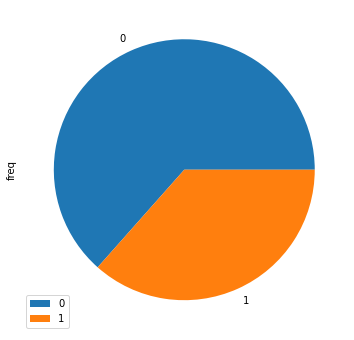

In [12]:
t = pd.crosstab(titanic_etude.sex, "freq")
t.plot.pie(subplots=True, figsize = (6, 6))

In [13]:
print("Visuel des corrélations par rapport à la colonne 'Survived'")
print("============================")
titanic_etude.corrwith(titanic_etude['survived'], method='pearson').abs().sort_values(ascending=False)

Visuel des corrélations par rapport à la colonne 'Survived'


survived    1.000000
sex         0.538826
pclass      0.359653
age         0.077221
dtype: float64

Visuel des corrélations par rapport à la colonne 'Survived'


<AxesSubplot:>

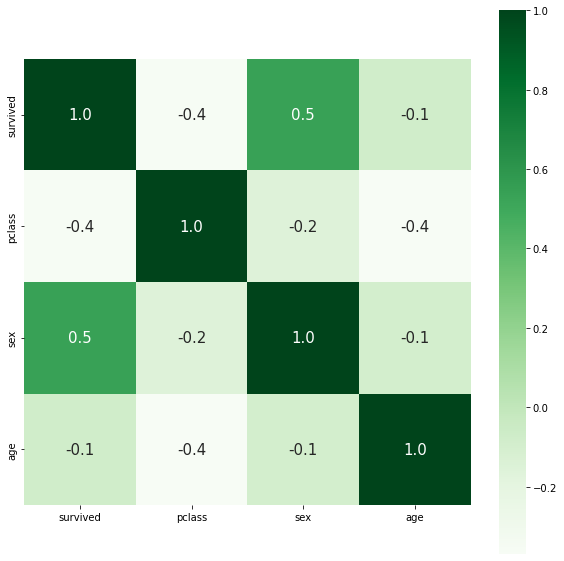

In [14]:
print("Visuel des corrélations par rapport à la colonne 'Survived'")
print("============================")

correlation=titanic_etude.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

## Partie Python 

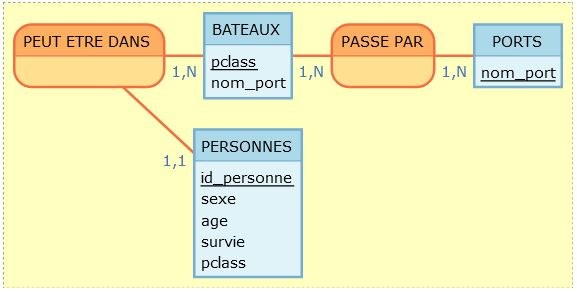

In [15]:
from IPython.display import Image
Image(filename='MCD.jpg') 

#### Préparation des fonctions pour communiquer avec la base de données: 
- création de la base nommée: titanic
- connexion
- deconnexion
- creation de tables
- suppression de tables

In [16]:
# -*- coding: utf-8 -*-
import mysql.connector as msc

#connexion au base de données
db = msc.connect(
  host = "localhost",
  user = "root",
  password = "root",
  port = '8081'
)

#créer un curseur de base de données pour effectuer des opérations SQL
cursor = db.cursor()

#exécuter le curseur avec la méthode execute() et transmettre la requête SQL
cursor.execute("CREATE DATABASE titanic")

In [17]:
import mysql.connector as msc


#=============================================================
def connexion():
    global bdd
    global cursor

    bdd = msc.connect(user='root', password='root', host='localhost', port='8081',database='titanic')
    #bdd = msc.connect(user='vever', password='vever', host='localhost',database='titanic')
    cursor = bdd.cursor()
    
#=============================================================
def deconnexion():
    global bdd
    global cursor

    cursor.close()
    bdd.close()
    
#=============================================================
def creation_table_personnes():
    global bdd
    global cursor
    
    connexion()
    
    cursor.execute('''CREATE TABLE personnes(id_personne INT NOT NULL AUTO_INCREMENT PRIMARY KEY, 
                                                sexe INT, 
                                                age INT,
                                                survie INT,
                                                pclass INT
                                                 
                                              )''')

    bdd.commit()
    
    deconnexion()

#=============================================================
def creation_table_bateaux():
    global bdd
    global cursor
    
    connexion()
    
    cursor.execute('''CREATE TABLE bateaux( 
                                            pclass INT PRIMARY KEY , 
                                            nom_port VARCHAR(50) NOT NULL UNIQUE
                                            
                                            )''')

    bdd.commit()
    
    deconnexion()
    
#=============================================================
def creation_table_ports():
    global bdd
    global cursor
    
    connexion()
    
    cursor.execute('''CREATE TABLE ports(nom_port VARCHAR(50)NOT NULL UNIQUE PRIMARY KEY )''')

    bdd.commit()
    
    deconnexion()
    
#=============================================================

#### Utilisation des fonctions crées précédemment pour créer les différentes tables 
- Note: si les tables sont déjà crées => return un code erreur

In [18]:
creation_table_personnes()
creation_table_bateaux()
creation_table_ports()

#### Préparation des éléments nécéssaires pour les différentes tables pour la base de données

In [19]:
Table_personnes = np.array(titanic_etude[['survived', 'pclass', 'sex', 'age']])
Table_bateaux = np.array(titanic_complet[['pclass', 'embark_town']])
Table_ports = np.array(titanic_complet[['embark_town']])

#### Mise sous forme de dataframe pour préparation de la donnée

In [20]:
df_table_personnes = pd.DataFrame(Table_personnes)
# 0 : survived, 1: classe, 2: sexe, 3: age
print(df_table_personnes.head())
print("==============")

df_table_bateaux = pd.DataFrame(Table_bateaux)
print(df_table_bateaux.head())
print("==============")

df_table_ports = pd.DataFrame(Table_ports)
print(df_table_ports.head())
print("==============")

     0    1    2     3
0  0.0  3.0  0.0  22.0
1  1.0  1.0  1.0  38.0
2  1.0  3.0  1.0  26.0
3  1.0  1.0  1.0  35.0
4  0.0  3.0  0.0  35.0
   0            1
0  3  Southampton
1  1    Cherbourg
2  3  Southampton
3  1  Southampton
4  3  Southampton
             0
0  Southampton
1    Cherbourg
2  Southampton
3  Southampton
4  Southampton


### Préparation des données:

- Nommage des colonnes avec des noms explicites pour faciliter le traitement
- Vérification et correction en cas de valeurs manquantes/nulles

In [21]:
df_table_personnes.rename(columns = {0 : 'survived', 1 : 'pclass', 2 : 'sex', 3: 'age'}, inplace = True)
print(df_table_personnes.head())
print("======")
print(df_table_personnes.isnull().sum())
print("================================================================")

df_table_bateaux.rename(columns = {0 : 'pclass', 1 : 'nom_port'}, inplace = True)
print(df_table_bateaux.head())
print("======")
print(df_table_bateaux.isnull().sum())
df_table_bateaux["nom_port"].fillna('',inplace=True)
print(df_table_bateaux.isnull().sum())
print("================================================================")

df_table_ports.rename(columns = {0 : 'nom_port'}, inplace = True)
print(df_table_ports.head())
print("======")
print(df_table_ports.isnull().sum())
df_table_ports["nom_port"].fillna('',inplace=True)
print(df_table_ports.isnull().sum())
print("================================================================")

   survived  pclass  sex   age
0       0.0     3.0  0.0  22.0
1       1.0     1.0  1.0  38.0
2       1.0     3.0  1.0  26.0
3       1.0     1.0  1.0  35.0
4       0.0     3.0  0.0  35.0
survived    0
pclass      0
sex         0
age         0
dtype: int64
  pclass     nom_port
0      3  Southampton
1      1    Cherbourg
2      3  Southampton
3      1  Southampton
4      3  Southampton
pclass      0
nom_port    2
dtype: int64
pclass      0
nom_port    0
dtype: int64
      nom_port
0  Southampton
1    Cherbourg
2  Southampton
3  Southampton
4  Southampton
nom_port    2
dtype: int64
nom_port    0
dtype: int64


#### Export des dataframes au format CSV pour l'écrire en base ensuite

In [22]:
from pathlib import Path  

filepath = Path('C:/Users/utilisateur/Documents/TP_Stephane/14_BRIEF_Analyse_Données/table_personnes.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  

df_table_personnes.to_csv(filepath, index=True) 

#===================================================================================

filepath = Path('C:/Users/utilisateur/Documents/TP_Stephane/14_BRIEF_Analyse_Données/table_bateaux.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  

df_table_bateaux.to_csv(filepath, index=True) 

#===================================================================================

filepath = Path('C:/Users/utilisateur/Documents/TP_Stephane/14_BRIEF_Analyse_Données/table_ports.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  

df_table_ports.to_csv(filepath, index=True) 

Test de bonne lecture

In [23]:
for row in df_table_personnes.itertuples():
    print(row)

Pandas(Index=0, survived=0.0, pclass=3.0, sex=0.0, age=22.0)
Pandas(Index=1, survived=1.0, pclass=1.0, sex=1.0, age=38.0)
Pandas(Index=2, survived=1.0, pclass=3.0, sex=1.0, age=26.0)
Pandas(Index=3, survived=1.0, pclass=1.0, sex=1.0, age=35.0)
Pandas(Index=4, survived=0.0, pclass=3.0, sex=0.0, age=35.0)
Pandas(Index=5, survived=0.0, pclass=1.0, sex=0.0, age=54.0)
Pandas(Index=6, survived=0.0, pclass=3.0, sex=0.0, age=2.0)
Pandas(Index=7, survived=1.0, pclass=3.0, sex=1.0, age=27.0)
Pandas(Index=8, survived=1.0, pclass=2.0, sex=1.0, age=14.0)
Pandas(Index=9, survived=1.0, pclass=3.0, sex=1.0, age=4.0)
Pandas(Index=10, survived=1.0, pclass=1.0, sex=1.0, age=58.0)
Pandas(Index=11, survived=0.0, pclass=3.0, sex=0.0, age=20.0)
Pandas(Index=12, survived=0.0, pclass=3.0, sex=0.0, age=39.0)
Pandas(Index=13, survived=0.0, pclass=3.0, sex=1.0, age=14.0)
Pandas(Index=14, survived=1.0, pclass=2.0, sex=1.0, age=55.0)
Pandas(Index=15, survived=0.0, pclass=3.0, sex=0.0, age=2.0)
Pandas(Index=16, surv

Pandas(Index=483, survived=0.0, pclass=3.0, sex=0.0, age=35.0)
Pandas(Index=484, survived=1.0, pclass=2.0, sex=1.0, age=24.0)
Pandas(Index=485, survived=0.0, pclass=3.0, sex=0.0, age=34.0)
Pandas(Index=486, survived=0.0, pclass=3.0, sex=1.0, age=26.0)
Pandas(Index=487, survived=1.0, pclass=2.0, sex=1.0, age=4.0)
Pandas(Index=488, survived=0.0, pclass=2.0, sex=0.0, age=26.0)
Pandas(Index=489, survived=0.0, pclass=3.0, sex=0.0, age=27.0)
Pandas(Index=490, survived=1.0, pclass=1.0, sex=0.0, age=42.0)
Pandas(Index=491, survived=1.0, pclass=3.0, sex=0.0, age=20.0)
Pandas(Index=492, survived=0.0, pclass=3.0, sex=0.0, age=21.0)
Pandas(Index=493, survived=0.0, pclass=3.0, sex=0.0, age=21.0)
Pandas(Index=494, survived=0.0, pclass=1.0, sex=0.0, age=61.0)
Pandas(Index=495, survived=0.0, pclass=2.0, sex=0.0, age=57.0)
Pandas(Index=496, survived=1.0, pclass=1.0, sex=1.0, age=21.0)
Pandas(Index=497, survived=0.0, pclass=3.0, sex=0.0, age=26.0)
Pandas(Index=498, survived=1.0, pclass=1.0, sex=0.0, age

#### Ecriture des fonctions permettant de transférer les données du dataset dans la base de données

In [24]:
def ecriture_table_personnes():

    connexion()

    for row in df_table_personnes.itertuples():


        insert_stmt = (
                          "INSERT INTO personnes (sexe, age, survie, pclass) "
                          "VALUES (%s, %s, %s, %s)"
                       )

        data = (row.sex, row.age, row.survived, row.pclass)
        cursor.execute(insert_stmt, data)


    bdd.commit()

    deconnexion()
    
#==========================================================================================
def ecriture_table_bateaux():

    connexion()

    for row in df_table_bateaux.itertuples():


        insert_stmt = (
                          "INSERT IGNORE INTO bateaux (pclass, nom_port) "
                          "VALUES (%s, %s)"
                       )

        data = (row.pclass, row.nom_port)
        cursor.execute(insert_stmt, data)


    bdd.commit()

    deconnexion()
    
#==========================================================================================
def ecriture_table_ports():

    connexion()

    for row in df_table_bateaux.itertuples():


        insert_stmt = (
                          "INSERT IGNORE INTO ports (nom_port) "
                          "VALUES (%s)"
                       )

        data = (row.nom_port,)
        cursor.execute(insert_stmt, data)


    bdd.commit()

    deconnexion()

#### Utilisation des fonctions crées précédemment pour stocker les datas en base de données

In [25]:
ecriture_table_personnes()
ecriture_table_bateaux()
ecriture_table_ports()

Altération des tables pour créer les clés étrangères

In [26]:
def creation_clefs_etrangeres():
    global bdd
    global cursor
    
    connexion()
    
    cursor.execute('''ALTER TABLE bateaux ADD FOREIGN KEY(nom_port) REFERENCES ports(nom_port)''')
    cursor.execute('''ALTER TABLE personnes ADD FOREIGN KEY(pclass) REFERENCES bateaux(pclass)''')

    bdd.commit()
    
    deconnexion()
    
#=============================================================

In [27]:
creation_clefs_etrangeres()

Création de procédure pour la forme

In [28]:
def creation_procedure_choix_classe():
    global bdd
    global cursor
    
    connexion()
    
    cursor.execute('''CREATE PROCEDURE choix_classe
    
                        (IN input INT )
                        
                        BEGIN
                        
                        SELECT personnes.sexe, personnes.age
                        FROM personnes
                        INNER JOIN bateaux ON bateaux.pclass = personnes.pclass
                        WHERE bateaux.pclass = input;
                        
                        END
                        
                    ''')

    bdd.commit()
    
    deconnexion()
    
#=============================================================

In [29]:
creation_procedure_choix_classe()